<a href="https://colab.research.google.com/github/tomosantos/dio-ml-projects/blob/main/notebooks/dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing Libraries

This section imports the necessary libraries:

* `os`: Handles directory and path manipulations.
* `Pillow (PIL)`: Used for loading, manipulating, and saving images.
* `random`: Selects a random image for display at the end.
* `matplotlib.pyplot`: Visualizes images in different formats (original, grayscale, and binary).

In [1]:
import os
from PIL import Image
import random
import matplotlib.pyplot as plt

## 2. Downloading and Organizing the Dataset

This section downloads the dataset from a specified GitHub link, unzips it, and organizes the images into a dedicated folder:

1. **Download:** The dataset is downloaded as a zip file using `wget`.
2. **Unzip:** The zip file is extracted into a folder called `images`.
3. **Clean Up:** The zip file is deleted after extraction to save space.
4. The folder `images` is then used as the `input_folder` for image processing.


In [6]:
!wget https://github.com/tomosantos/dio-ml-projects/raw/refs/heads/main/data/dimensionality-reduction-images/dataset.zip

--2024-12-19 01:00:49--  https://github.com/tomosantos/dio-ml-projects/raw/refs/heads/main/data/dimensionality-reduction-images/dataset.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tomosantos/dio-ml-projects/refs/heads/main/data/dimensionality-reduction-images/dataset.zip [following]
--2024-12-19 01:00:49--  https://raw.githubusercontent.com/tomosantos/dio-ml-projects/refs/heads/main/data/dimensionality-reduction-images/dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2859075 (2.7M) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]   2.7

In [7]:
!mkdir -p images
!unzip -q -o dataset.zip -d images
!rm dataset.zip

## 3. Function to Convert an Image to Grayscale

This function, `convert_to_grayscale`, takes a color image and converts it to grayscale using the following luminosity formula:

$$
\text{Gray} = 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B
$$

* **R**, **G**, and **B** represent the red, green, and blue color values of each pixel.
* The resulting image is grayscale, with pixel values ranging from 0 (black) to 255 (white).

In [8]:
# Function to convert image to grayscale
def convert_to_grayscale(image):

  width, height  = image.size
  grayscale_image = Image.new("L", (width, height))

  for x in range(width):
    for y in range(height):
      r, g, b = image.getpixel((x, y))
      gray_value = int(0.299 * r + 0.587 * g + 0.114 * b) # conversão para tons de cinza
      grayscale_image.putpixel((x, y), gray_value)

  return grayscale_image

## 4. Function to Convert an Image to Binary *(Black and White)*

This function, `convert_to_binary`, takes a grayscale image and applies a threshold to convert it into binary (black and white):

* Pixels with values above the threshold (default is 127) are converted to 255 (white).
* Pixels with values at or below the threshold are converted to 0 (black).

The output is a binary image.

In [9]:
# Function to convert image to binary
def convert_binary(image, threshold=127):

  width, height = image.size
  binary_image = Image.new("L", (width, height))

  for x in range(width):
    for y in range(height):
      gray_value = image.getpixel((x, y))
      binary_value = 255 if gray_value > threshold else 0   # applying threshold
      binary_image.putpixel((x, y), binary_value)

  return binary_image

## 5. Function to Process Images in a Folder

The `process_images` function automates the processing of multiple images in a folder:

1. **Checks the Output Folder:** Creates the output folder (`treated`) if it doesn't exist.
2. **Processes Each Image:**
  * Opens the image from the `input_folder`.
  * Converts the image to grayscale and saves it.
  * Converts the grayscale image to binary and saves it.
3. **Organizes Processed Files:** Saves the processed images in the `treated` folder with suffixes `_gray` and `_binary` added to their names.

In [10]:
# Function to process images in a folder
def process_images(input_folder, output_folder):

  processed_images = []

  # Create 'treated' folder if it doesn't exist
  if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"Folder {output_folder} created.")
  else:
    print(f"Folder {output_folder} already exists. Continuing...")

  # Process each file in the input folder
  for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
      input_path = os.path.join(input_folder, filename)
      print(f"Processing {filename}...")

      # Open the image
      with Image.open(input_path) as img:
        # Convert to grayscale
        gray_image = convert_to_grayscale(img)
        gray_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_gray.png")
        gray_image.save(gray_path)
        print(f"Grayscale image saved: {filename}_gray.png")

        # Convert to binary
        binary_image = convert_binary(gray_image)
        binary_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_binary.png")
        binary_image.save(binary_path)
        print(f"Binary image saved: {filename}_binary.png")

        # Add paths to the processed images
        processed_images.append((input_path, gray_path, binary_path))

  return processed_images


## 6. Running the Processing

The process_images function is executed to process all images in the `input_folder`. Each image is:

1. Converted to **grayscale**.
2. Converted to **binary**.
3. Saved in the `treated` folder.

In [11]:
# Defining input and output folders
input_folder = "images"
output_folder = "treated"

In [12]:
# Initial check for input folder
if not os.path.exists(input_folder):
  print(f"Error: Input folder '{input_folder}' not found.")
else:
  print('Input folder found. Processing will start.')

Input folder found. Processing will start.


In [13]:
# Running the processing
processed_images = process_images(input_folder, output_folder)

Folder treated created.
Processing urso.jpg...
Grayscale image saved: urso.jpg_gray.png
Binary image saved: urso.jpg_binary.png
Processing onca.jpg...
Grayscale image saved: onca.jpg_gray.png
Binary image saved: onca.jpg_binary.png
Processing papagaio.jpg...
Grayscale image saved: papagaio.jpg_gray.png
Binary image saved: papagaio.jpg_binary.png
Processing borboleta.jpg...
Grayscale image saved: borboleta.jpg_gray.png
Binary image saved: borboleta.jpg_binary.png
Processing borboletajpg.jpg...
Grayscale image saved: borboletajpg.jpg_gray.png
Binary image saved: borboletajpg.jpg_binary.png
Processing olho.jpg...
Grayscale image saved: olho.jpg_gray.png
Binary image saved: olho.jpg_binary.png
Processing garota.jpg...
Grayscale image saved: garota.jpg_gray.png
Binary image saved: garota.jpg_binary.png
Processing paisagem.jpg...
Grayscale image saved: paisagem.jpg_gray.png
Binary image saved: paisagem.jpg_binary.png
Processing casamento.jpg...
Grayscale image saved: casamento.jpg_gray.png
B

## 7. Displaying a Random Image in Three Versions

After processing, a random image is selected and displayed in three formats:

1. **Original:** The unprocessed image.
2. **Grayscale:** The processed grayscale version.
3. **Binary:** The processed binary version.

The images are displayed side-by-side using `matplotlib`.

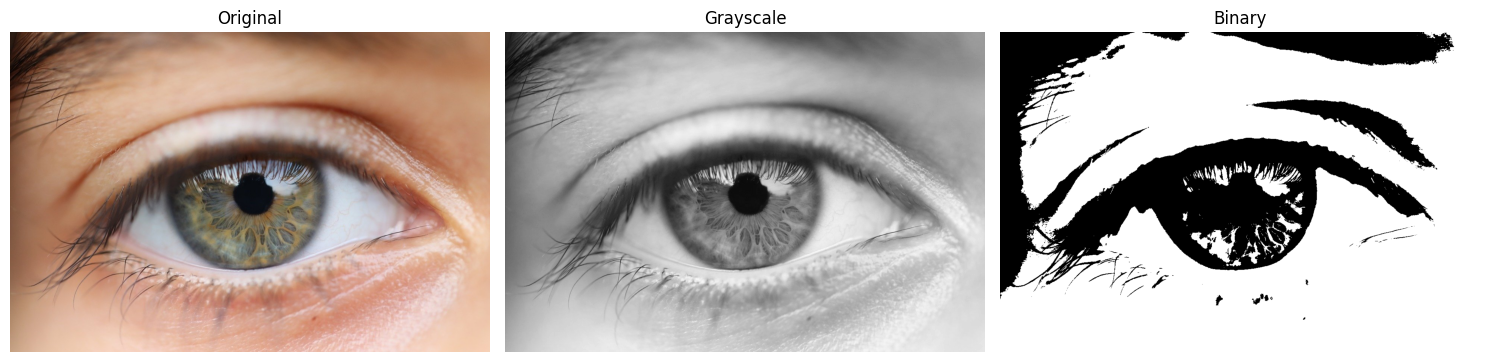

In [38]:
# Testing with a random image
if processed_images:
  random_image = random.choice(processed_images)
  original, gray, binary = random_image

  # Load images
  original_image = Image.open(original)
  gray_image = Image.open(gray)
  binary_image = Image.open(binary)

  # Plot the images
  plt.figure(figsize=(15, 5))

  plt.subplot(1, 3, 1)
  plt.imshow(original_image)
  plt.title('Original')
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.imshow(gray_image, cmap='gray')
  plt.title('Grayscale')
  plt.axis('off')

  plt.subplot(1, 3, 3)
  plt.imshow(binary_image, cmap='gray')
  plt.title('Binary')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

else:
  print("No images were processed.")

In [15]:
# Conclusion
print("Processing completed! Images have been saved to the 'treated' folder.")

Processing completed! Images have been saved to the 'treated' folder.
